SIMPLE SOLAR SYSTEM SIMULATOR
CONTROLS:
1. Time Speed: Adjust simulation speed (0.1x to 5x)
2. Gravity: Change gravity constant (0.5G to 2G)
3. Show Orbits: Toggle planet orbit trails
4. Show Physics: Toggle physics information


interactive(children=(FloatSlider(value=1.0, description='Time Speed:', max=5.0, min=0.1), Checkbox(value=True…

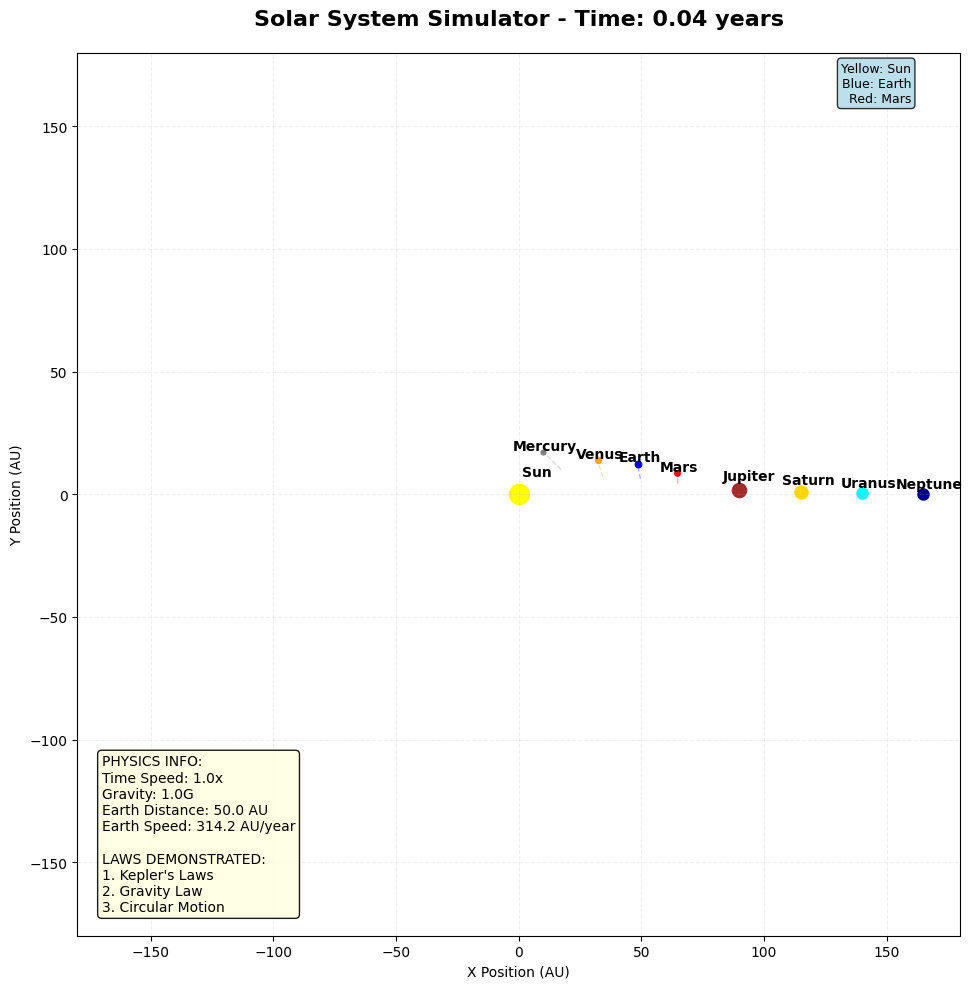

Time: 0.04 years | Speed: 1.0x | Gravity: 1.0G
----------------------------------------


In [1]:
"""
Simple Solar System Simulator - Minimal Version
No fonts, no emoji, just pure physics
"""

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Checkbox
import warnings
warnings.filterwarnings('ignore')

print("SIMPLE SOLAR SYSTEM SIMULATOR")
print("=" * 50)

# Planet data: [name, color, size, radius, period]
planets = [
    ["Sun", "yellow", 300, 0, 0],
    ["Mercury", "gray", 30, 20, 0.24],
    ["Venus", "orange", 40, 35, 0.62],
    ["Earth", "blue", 45, 50, 1.00],
    ["Mars", "red", 35, 65, 1.88],
    ["Jupiter", "brown", 150, 90, 11.86],
    ["Saturn", "gold", 130, 115, 29.46],
    ["Uranus", "cyan", 100, 140, 84.01],
    ["Neptune", "darkblue", 100, 165, 164.8]
]

# Global variables
current_time = 0.0
paths = [[] for _ in range(len(planets))]

def update_simulation(time_speed=1.0, show_orbits=True, show_physics=True, gravity=1.0):
    """Update the simulation"""
    global current_time, paths
    
    # Update time
    current_time += 0.02 * time_speed
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Set limits
    ax.set_xlim(-180, 180)
    ax.set_ylim(-180, 180)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.2, linestyle='--')
    
    # Plot each planet
    for i, (name, color, size, radius, period) in enumerate(planets):
        if i == 0:  # Sun
            x, y = 0, 0
        else:
            # Calculate position
            angle = 2 * np.pi * current_time / period
            x = radius * np.cos(angle)
            y = radius * np.sin(angle)
            
            # Record path
            paths[i].append((x, y))
            if len(paths[i]) > 80:
                paths[i].pop(0)
            
            # Draw orbit path
            if show_orbits and len(paths[i]) > 1:
                path_array = np.array(paths[i])
                ax.plot(path_array[:, 0], path_array[:, 1], 
                       color=color, alpha=0.3, linewidth=1, linestyle='--')
        
        # Draw planet
        ax.scatter(x, y, color=color, s=size, 
                  edgecolors='white', linewidth=2 if i == 0 else 1)
        
        # Add label
        label_offset = size / 40
        label_x = x + label_offset
        label_y = y + label_offset
        ax.text(label_x, label_y, name, fontsize=10, 
               fontweight='bold', ha='center')
    
    # Title
    ax.set_title(f"Solar System Simulator - Time: {current_time:.2f} years", 
                fontsize=16, fontweight='bold', pad=20)
    
    # Physics info
    if show_physics:
        # Calculate Earth position
        earth_angle = 2 * np.pi * current_time
        earth_x = 50 * np.cos(earth_angle)
        earth_y = 50 * np.sin(earth_angle)
        earth_distance = np.sqrt(earth_x**2 + earth_y**2)
        earth_speed = 2 * np.pi * earth_distance
        
        info_text = (
            f"PHYSICS INFO:\n"
            f"Time Speed: {time_speed:.1f}x\n"
            f"Gravity: {gravity:.1f}G\n"
            f"Earth Distance: {earth_distance:.1f} AU\n"
            f"Earth Speed: {earth_speed:.1f} AU/year\n\n"
            f"LAWS DEMONSTRATED:\n"
            f"1. Kepler's Laws\n"
            f"2. Gravity Law\n"
            f"3. Circular Motion"
        )
        
        ax.text(-170, -170, info_text, fontsize=10,
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))
    
    # Labels
    ax.set_xlabel("X Position (AU)")
    ax.set_ylabel("Y Position (AU)")
    
    # Legend
    ax.text(160, 160, "Yellow: Sun\nBlue: Earth\nRed: Mars", 
            fontsize=9, ha='right',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Console output
    print(f"Time: {current_time:.2f} years | Speed: {time_speed:.1f}x | Gravity: {gravity:.1f}G")
    print("-" * 40)

def reset_simulation():
    """Reset simulation"""
    global current_time, paths
    current_time = 0.0
    paths = [[] for _ in range(len(planets))]
    print("Simulation Reset")
    update_simulation()

# Create widgets
time_widget = FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Time Speed:')
gravity_widget = FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1, description='Gravity:')
orbits_widget = Checkbox(value=True, description='Show Orbits')
physics_widget = Checkbox(value=True, description='Show Physics')

print("CONTROLS:")
print("1. Time Speed: Adjust simulation speed (0.1x to 5x)")
print("2. Gravity: Change gravity constant (0.5G to 2G)")
print("3. Show Orbits: Toggle planet orbit trails")
print("4. Show Physics: Toggle physics information")
print("=" * 50)

# Create interactive interface
interact(update_simulation, 
         time_speed=time_widget,
         gravity=gravity_widget,
         show_orbits=orbits_widget,
         show_physics=physics_widget)

# Initial display
update_simulation()